**Analysis of data from the Extracted Features of the Apnea-ECG Database for all records**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
apnea_feature_data=pd.read_excel('/content/sample_data/MLSH-dataset-L1.xlsx')
apnea_feature_data

,Participant,Category,NN_RR,AVNN,IHR,SDNN,SDANN,SDNNIDX,rMSSD,pNN10,pNN20,pNN30,pNN40,pNN50,tot_pwr,ULF,VLF,LF,HF,LF_HF,LF_n,HF_n
0,0,A,0.999970,836.336,71.741501,74.9342,45.5641,55.4628,25.1387,61.3931,29.6775,16.41700,6.173430,3.441220,5852.65,2675.950,2082.660,847.965,246.0770,3.44593,0.775075,0.224925
1,1,A,0.999680,980.794,61.174926,86.4631,57.3369,55.6853,26.9386,60.9649,26.4666,14.11510,6.126000,3.871860,8793.63,4467.600,3145.010,985.214,195.7980,5.03179,0.834212,0.165788
2,2,A,0.993108,1000.260,59.984404,59.7562,32.5391,47.8997,31.0587,59.4547,29.5596,19.18200,10.532700,7.390940,3723.20,1336.050,1322.780,802.306,262.0580,3.06156,0.753789,0.246211
3,3,A,0.959997,787.438,76.196475,59.2220,27.0160,39.2539,43.5362,29.7286,13.7209,12.54190,11.468000,10.682000,2813.47,761.872,1339.350,361.275,350.9710,1.02936,0.507233,0.492767
4,4,B,0.999689,973.366,61.641767,117.9690,67.9543,89.0453,73.9128,86.7052,72.8064,63.79220,51.802800,44.245100,14734.80,6590.450,4729.390,2354.480,1060.5200,2.22012,0.689452,0.310548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,488,A,0.999909,896.956,66.892913,49.6962,33.7220,35.5952,14.1085,44.0056,10.0732,3.19682,0.667901,0.336987,2842.36,1224.280,1182.250,367.972,67.8646,5.42215,0.844289,0.155711
489,489,A,0.999613,960.321,62.479109,47.8440,30.9820,33.3016,22.3293,62.0253,26.5478,12.24490,3.539140,1.623180,2492.80,1101.070,920.625,313.928,157.1760,1.99730,0.666367,0.333633
490,490,B,0.999880,963.138,62.296369,64.8168,52.4380,39.0670,19.2998,56.3310,22.5962,11.47760,4.000000,1.730810,4990.76,2560.220,1680.300,577.137,173.1090,3.33395,0.769264,0.230736
491,491,A,0.977802,986.468,60.823058,45.1182,35.0136,29.3724,20.6881,62.0366,26.5893,13.09090,4.074400,1.903460,2256.99,1260.840,587.957,232.695,175.4900,1.32597,0.570072,0.429928


**Descriptive Analysis**

In [5]:
apnea_feature_data.describe()

,Participant,NN_RR,AVNN,IHR,SDNN,SDANN,SDNNIDX,rMSSD,pNN10,pNN20,pNN30,pNN40,pNN50,tot_pwr,ULF,VLF,LF,HF,LF_HF,LF_n,HF_n
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,246.000000,0.981825,968.160154,63.159077,78.424024,54.558257,52.119256,37.225187,62.116038,34.741182,24.231103,14.806811,10.998587,7604.396846,3788.795093,2077.903732,1098.025386,639.678918,2.438171,0.647561,0.352439
std,142.461106,0.052348,133.007471,8.840921,26.130325,22.330160,21.442332,22.873266,16.583218,19.355675,17.646819,14.395127,12.462205,5812.225631,3097.535438,1860.045593,1449.400257,997.077270,1.674405,0.146650,0.146650
min,0.000000,0.505680,603.824000,42.931660,16.380600,14.341600,6.164800,5.234500,1.763530,1.063760,0.346649,0.097961,0.062339,283.458000,229.128000,43.255000,7.756420,3.318810,0.199845,0.166559,0.085771
25%,123.000000,0.992511,883.495000,56.828945,60.216500,40.613500,36.929600,23.234800,50.975200,18.801200,9.540980,3.615990,1.906120,3916.660000,1853.600000,943.774000,398.854000,177.395000,1.187020,0.542756,0.231103
50%,246.000000,0.998159,957.889000,62.637738,74.772200,50.316300,48.272600,31.836300,65.059300,33.865700,21.129800,10.237200,6.424260,6182.740000,2908.120000,1582.190000,718.052000,372.857000,2.042320,0.671303,0.328697
75%,369.000000,0.999495,1055.800000,67.912099,90.530900,64.152700,62.171600,43.648000,75.042200,48.908100,35.519700,21.340600,15.917300,9278.530000,4590.610000,2575.980000,1296.960000,659.454000,3.327080,0.768897,0.457244
max,492.000000,0.999971,1397.570000,99.366703,213.697000,256.855000,187.348000,204.545000,92.095300,82.915300,77.974800,72.164500,68.938400,48863.700000,31032.300000,16863.600000,22251.300000,9287.110000,10.659000,0.914229,0.833441


In [6]:
apnea_feature_data['Patient_status']=" "

In [7]:
#Patient_status column is updated with values
apnea_feature_data.loc[apnea_feature_data['Category'] =='B', 'Patient_status'] = 'Healthy'
apnea_feature_data.loc[apnea_feature_data['Category'] =='A', 'Patient_status'] = 'Patient'

In [8]:
apnea_feature_data

,Participant,Category,NN_RR,AVNN,IHR,SDNN,SDANN,SDNNIDX,rMSSD,pNN10,pNN20,pNN30,pNN40,pNN50,tot_pwr,ULF,VLF,LF,HF,LF_HF,LF_n,HF_n,Patient_status
0,0,A,0.999970,836.336,71.741501,74.9342,45.5641,55.4628,25.1387,61.3931,29.6775,16.41700,6.173430,3.441220,5852.65,2675.950,2082.660,847.965,246.0770,3.44593,0.775075,0.224925,Patient
1,1,A,0.999680,980.794,61.174926,86.4631,57.3369,55.6853,26.9386,60.9649,26.4666,14.11510,6.126000,3.871860,8793.63,4467.600,3145.010,985.214,195.7980,5.03179,0.834212,0.165788,Patient
2,2,A,0.993108,1000.260,59.984404,59.7562,32.5391,47.8997,31.0587,59.4547,29.5596,19.18200,10.532700,7.390940,3723.20,1336.050,1322.780,802.306,262.0580,3.06156,0.753789,0.246211,Patient
3,3,A,0.959997,787.438,76.196475,59.2220,27.0160,39.2539,43.5362,29.7286,13.7209,12.54190,11.468000,10.682000,2813.47,761.872,1339.350,361.275,350.9710,1.02936,0.507233,0.492767,Patient
4,4,B,0.999689,973.366,61.641767,117.9690,67.9543,89.0453,73.9128,86.7052,72.8064,63.79220,51.802800,44.245100,14734.80,6590.450,4729.390,2354.480,1060.5200,2.22012,0.689452,0.310548,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,488,A,0.999909,896.956,66.892913,49.6962,33.7220,35.5952,14.1085,44.0056,10.0732,3.19682,0.667901,0.336987,2842.36,1224.280,1182.250,367.972,67.8646,5.42215,0.844289,0.155711,Patient
489,489,A,0.999613,960.321,62.479109,47.8440,30.9820,33.3016,22.3293,62.0253,26.5478,12.24490,3.539140,1.623180,2492.80,1101.070,920.625,313.928,157.1760,1.99730,0.666367,0.333633,Patient
490,490,B,0.999880,963.138,62.296369,64.8168,52.4380,39.0670,19.2998,56.3310,22.5962,11.47760,4.000000,1.730810,4990.76,2560.220,1680.300,577.137,173.1090,3.33395,0.769264,0.230736,Healthy
491,491,A,0.977802,986.468,60.823058,45.1182,35.0136,29.3724,20.6881,62.0366,26.5893,13.09090,4.074400,1.903460,2256.99,1260.840,587.957,232.695,175.4900,1.32597,0.570072,0.429928,Patient


In [9]:
apnea_feature_data.dtypes

Participant         int64
Category           object
NN_RR             float64
AVNN              float64
IHR               float64
SDNN              float64
SDANN             float64
SDNNIDX           float64
rMSSD             float64
pNN10             float64
pNN20             float64
pNN30             float64
pNN40             float64
pNN50             float64
tot_pwr           float64
ULF               float64
VLF               float64
LF                float64
HF                float64
LF_HF             float64
LF_n              float64
HF_n              float64
Patient_status     object
dtype: object

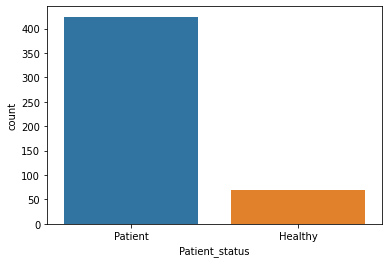

In [10]:
sns.countplot(data=apnea_feature_data, x="Patient_status")

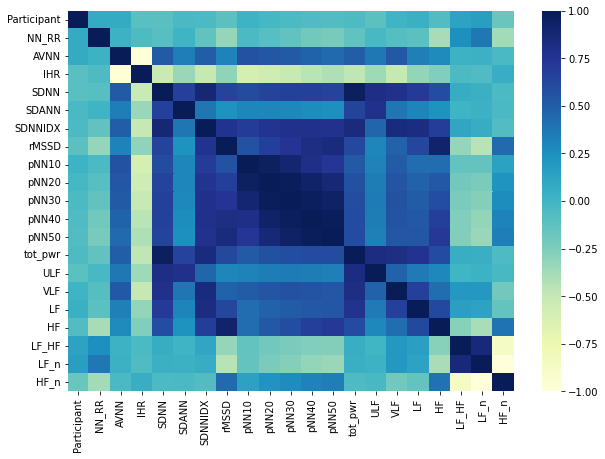

In [41]:
corr=apnea_feature_data.corr()
corr
heatmap, ax = plt.subplots(figsize = (10,7))
ax=sns.heatmap(corr,cmap="YlGnBu")

The Distribution of the features have been analyzed through the Weka software and the corresponding plots for all the normally distributed features are provided below

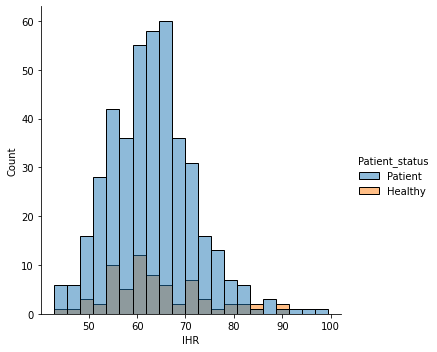

In [11]:
sns.displot(apnea_feature_data,x="IHR", hue="Patient_status")

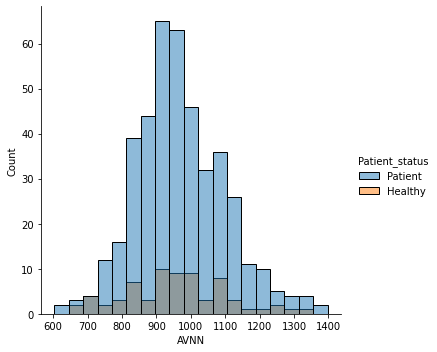

In [12]:
sns.displot(apnea_feature_data,x="AVNN", hue="Patient_status")

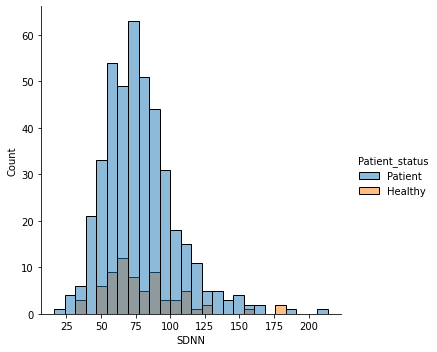

In [13]:
sns.displot(apnea_feature_data,x="SDNN", hue="Patient_status")

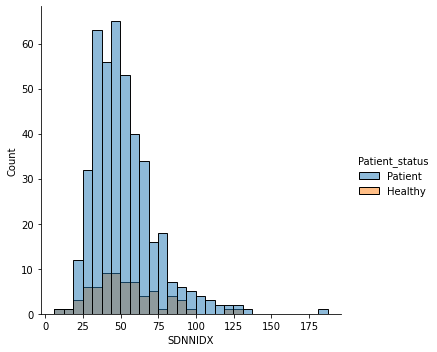

In [14]:
sns.displot(apnea_feature_data,x="SDNNIDX", hue="Patient_status")

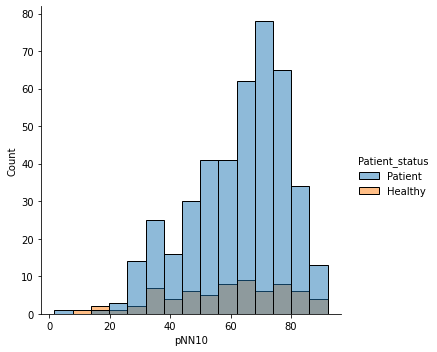

In [15]:
sns.displot(apnea_feature_data,x="pNN10", hue="Patient_status")

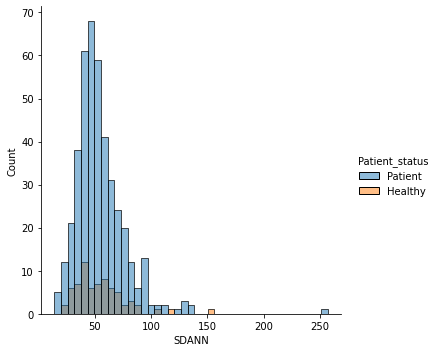

In [16]:
sns.displot(apnea_feature_data,x="SDANN", hue="Patient_status")

Healthy People seem to have a lower IHR, SDNN, SDANN, SDNNIDX and AVNN values compared to the Patients with Apnea

**T-tests are used to determine if there is significant difference between means of two categories**

In [17]:
import numpy as np
from scipy.stats import ttest_ind

In [18]:
IHR_Patient = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Patient', "IHR"]
IHR_Healthy = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Healthy', "IHR"] 

In [19]:
res_IHR = ttest_ind(IHR_Healthy,IHR_Patient,equal_var=True)
res_IHR

Ttest_indResult(statistic=0.8626219352489725, pvalue=0.3887664936793025)

**P Value for IHR feature is 0.39**

In [20]:
SDNN_Patient = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Patient', "SDNN"]
SDNN_Healthy = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Healthy', "SDNN"] 

In [21]:
res_SDNN = ttest_ind(SDNN_Healthy,SDNN_Patient,equal_var=True)
res_SDNN

Ttest_indResult(statistic=0.6764440501128773, pvalue=0.49907727753571063)

**P Value for SDNN feature is 0.499**

In [22]:
SDNNIDX_Patient = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Patient', "SDNNIDX"]
SDNNIDX_Healthy = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Healthy', "SDNNIDX"] 
res_SDNNIDX = ttest_ind(SDNNIDX_Healthy,SDNNIDX_Patient,equal_var=True)
res_SDNNIDX

Ttest_indResult(statistic=0.5823009416078738, pvalue=0.5606312755786298)

**P Value for SDNNIDX feature is 0.56**

In [23]:
AVNN_Patient = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Patient', "AVNN"]
AVNN_Healthy = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Healthy', "AVNN"] 
res_AVNN = ttest_ind(AVNN_Healthy,AVNN_Patient,equal_var=True)
res_AVNN

Ttest_indResult(statistic=-0.557226878811793, pvalue=0.5776263485339017)

**P Value for AVNN feature is 0.58**

In [24]:
SDANN_Patient = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Patient', "SDANN"]
SDANN_Healthy = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Healthy', "SDANN"] 
res_SDANN = ttest_ind(SDANN_Healthy,SDANN_Patient,equal_var=True)
res_SDANN

Ttest_indResult(statistic=0.19454635015002486, pvalue=0.8458285747287833)

**P Value for SDANN feature is 0.85**

**A Mann-Whitney U test is used to compare the differences between two samples when the sample distributions are not normally distributed**

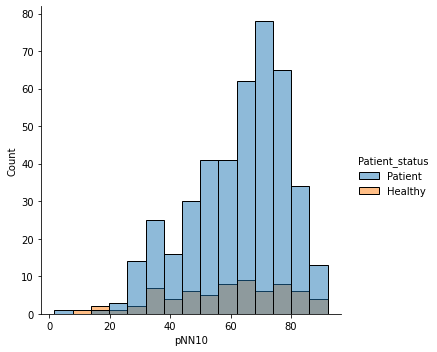

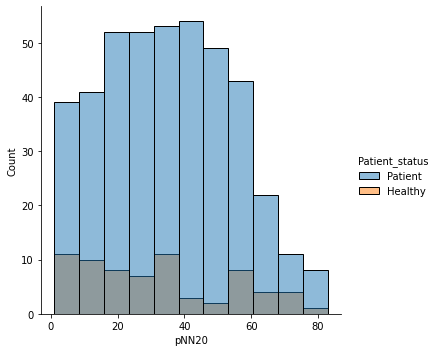

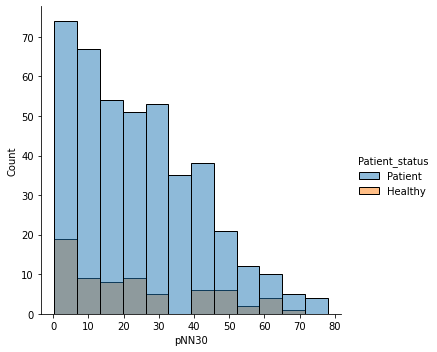

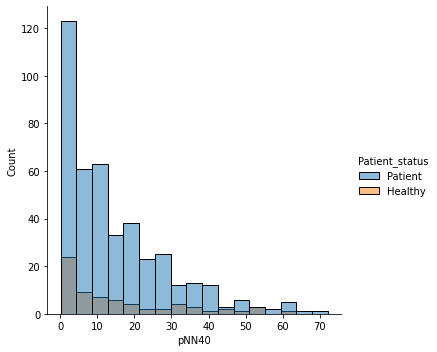

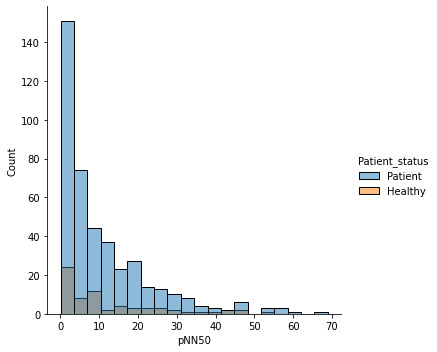

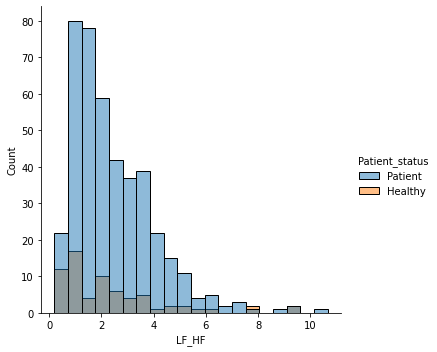

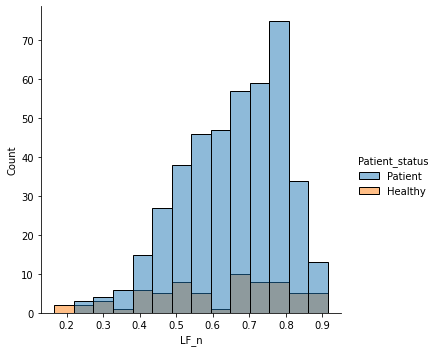

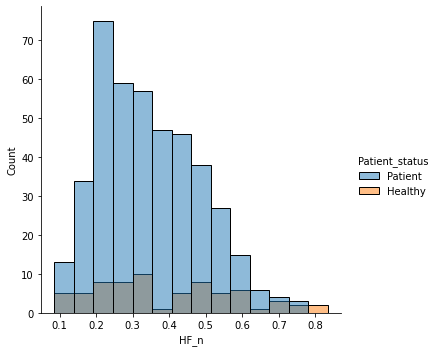

In [25]:
# Distribution plot for features which are not normally distributed. The data distribution has been tested in Weka

sns.displot(apnea_feature_data,x="pNN10", hue="Patient_status")
sns.displot(apnea_feature_data,x="pNN20", hue="Patient_status")
sns.displot(apnea_feature_data,x="pNN30", hue="Patient_status")
sns.displot(apnea_feature_data,x="pNN40", hue="Patient_status")
sns.displot(apnea_feature_data,x="pNN50", hue="Patient_status")
sns.displot(apnea_feature_data,x="LF_HF", hue="Patient_status")
sns.displot(apnea_feature_data,x="LF_n", hue="Patient_status")
sns.displot(apnea_feature_data,x="HF_n", hue="Patient_status")

**Mann-Whitney U test for the above Features**

In [26]:
import scipy.stats as stats

In [27]:
pNN10_Patient = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Patient', "pNN10"]
pNN10_Healthy = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Healthy', "pNN10"] 

MWU_pNN10=stats.mannwhitneyu(pNN10_Patient, pNN10_Healthy, alternative='two-sided')
MWU_pNN10

MannwhitneyuResult(statistic=16324.0, pvalue=0.12235574167064606)

**P-value for pNN10 feature is 0.122**

In [28]:
pNN20_Patient = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Patient', "pNN20"]
pNN20_Healthy = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Healthy', "pNN20"] 

MWU_pNN20=stats.mannwhitneyu(pNN20_Patient, pNN20_Healthy, alternative='two-sided')
MWU_pNN20

MannwhitneyuResult(statistic=16019.0, pvalue=0.20514063037345098)

**P-value for pNN20 feature is 0.21**

In [29]:
pNN30_Patient = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Patient', "pNN30"]
pNN30_Healthy = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Healthy', "pNN30"] 

MWU_pNN30=stats.mannwhitneyu(pNN30_Patient, pNN30_Healthy, alternative='two-sided')
MWU_pNN30

MannwhitneyuResult(statistic=15617.0, pvalue=0.36772999579553056)

**P-value for pNN30 feature is 0.37**

In [30]:
pNN40_Patient = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Patient', "pNN40"]
pNN40_Healthy = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Healthy', "pNN40"] 

MWU_pNN40=stats.mannwhitneyu(pNN40_Patient, pNN40_Healthy, alternative='two-sided')
MWU_pNN40

MannwhitneyuResult(statistic=14814.0, pvalue=0.8657731063477201)

**P-value for pNN40 feature is 0.87**

In [31]:
pNN50_Patient = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Patient', "pNN50"]
pNN50_Healthy = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Healthy', "pNN50"] 

MWU_pNN50=stats.mannwhitneyu(pNN50_Patient, pNN50_Healthy, alternative='two-sided')
MWU_pNN50

MannwhitneyuResult(statistic=14364.0, pvalue=0.8102492479616107)

**P-value for pNN50 feature is 0.81**

In [32]:
LF_HF_Patient = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Patient', "LF_HF"]
LF_HF_Healthy = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Healthy', "LF_HF"] 

MWU_LF_HF=stats.mannwhitneyu(LF_HF_Patient, LF_HF_Healthy, alternative='two-sided')
MWU_LF_HF

MannwhitneyuResult(statistic=16448.0, pvalue=0.09732731487133223)

**P-value for LF_HF feature is 0.097**

In [33]:
LF_n_Patient = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Patient', "LF_n"]
LF_n_Healthy = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Healthy', "LF_n"] 

MWU_LF_n=stats.mannwhitneyu(LF_n_Patient, LF_n_Healthy, alternative='two-sided')
MWU_LF_n

MannwhitneyuResult(statistic=16448.0, pvalue=0.0973273232504693)

**P-value for LF_n feature is 0.097**

In [34]:
HF_n_Patient = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Patient', "HF_n"]
HF_n_Healthy = apnea_feature_data.loc[apnea_feature_data["Patient_status"] =='Healthy', "HF_n"] 

MWU_HF_n=stats.mannwhitneyu(HF_n_Patient, HF_n_Healthy, alternative='two-sided')
MWU_HF_n

MannwhitneyuResult(statistic=12808.0, pvalue=0.0973273232504693)

**P-value for HF_n feature is 0.097**